In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

import weather_ch
sns.set()

In [2]:
df = weather_ch.read_standardized('../data/zh/standardized.csv')
df.head()

,Unnamed: 0,Year,Month,Temperature,Precipitation
0,0,1864,1,-6.3,-27.80
1,1,1864,2,-2.1,-19.70
2,2,1864,3,0.2,-8.70
3,3,1864,4,-1.2,-31.25
4,4,1864,5,-0.3,-19.50


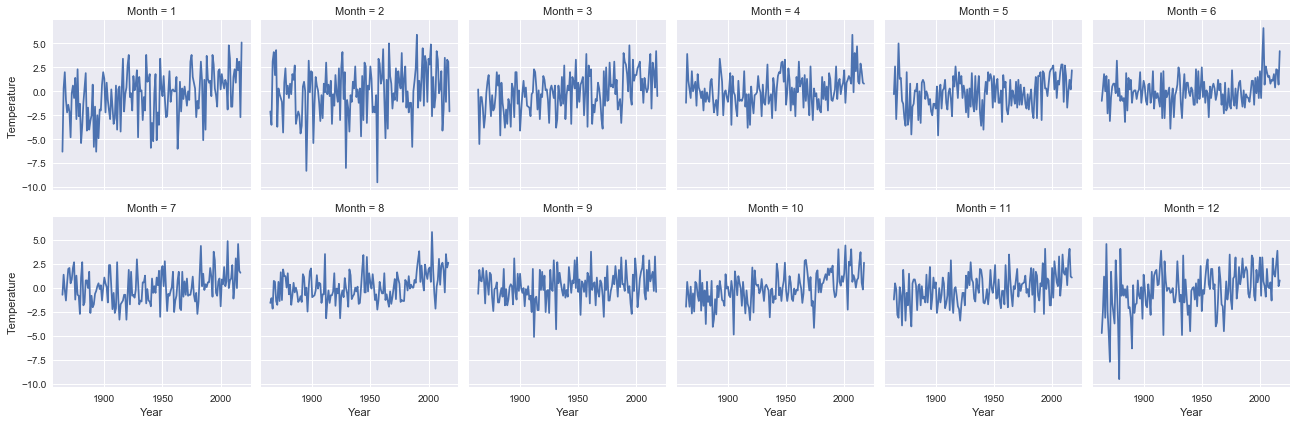

In [3]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(plt.plot, "Year","Temperature")

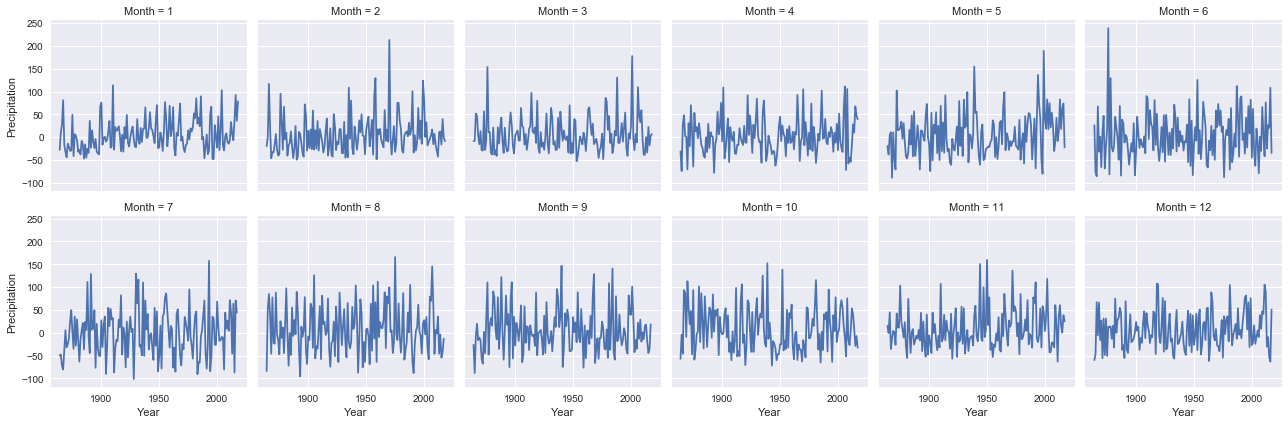

In [4]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(plt.plot, "Year","Precipitation")

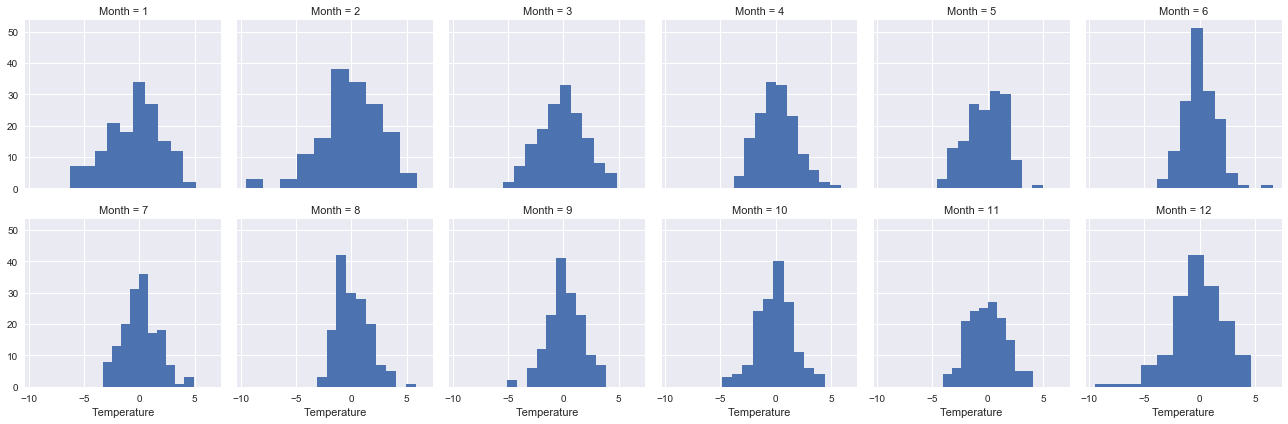

In [5]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(plt.hist, "Temperature")

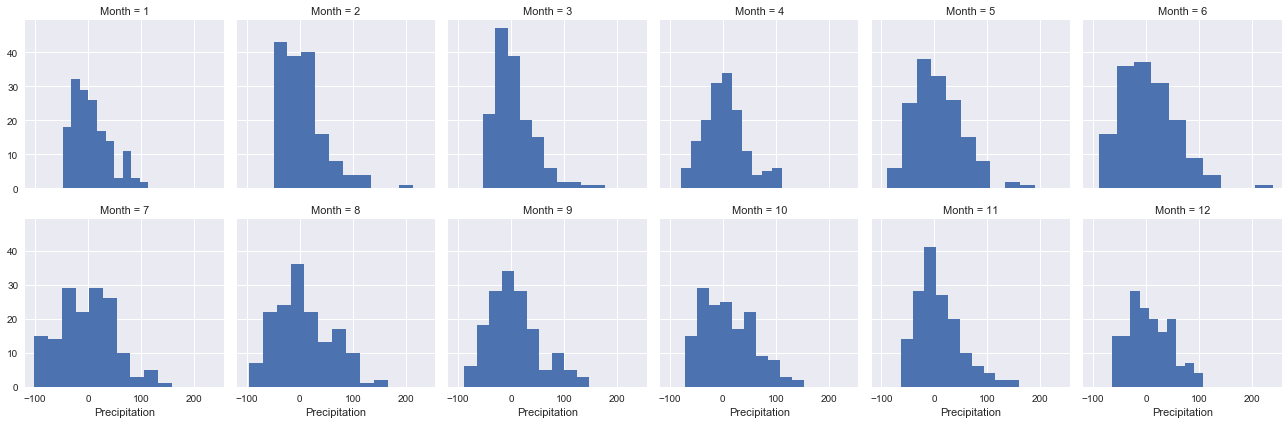

In [6]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(plt.hist, "Precipitation")

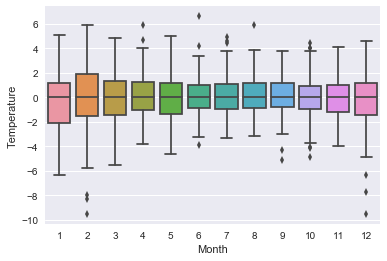

In [7]:
sns.boxplot(x='Month', y='Temperature', data=df)

In [8]:
import math
df['Decade'] = df['Year'].apply(lambda x: math.floor(x / 10) * 10)

/Users/rok/.virtualenvs/renku-demo/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


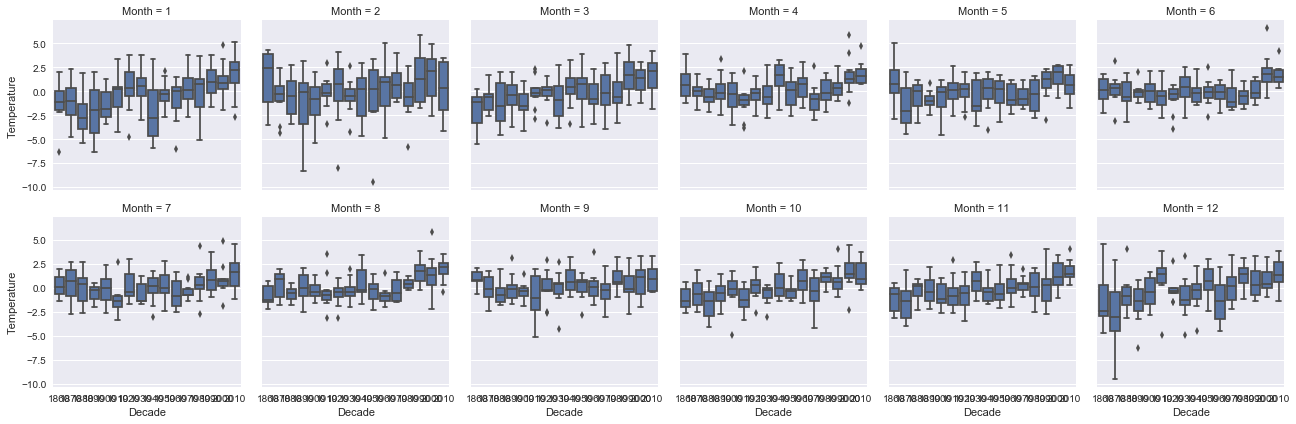

In [9]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(sns.boxplot, 'Decade', "Temperature")

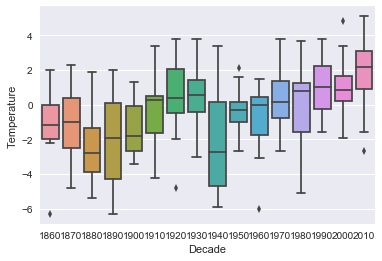

In [10]:
sns.boxplot('Decade', 'Temperature', hue=None, data=df[df['Month'] == 1])

In [11]:
def t_test(df, ref=2010, col='Temperature'):
    ref_df = df[df['Decade'] == ref]
    results = {"p": [], 'Decade': [], 'Month': []}
    for month, month_g in df.groupby('Month'):
        for decade, g in month_g.groupby('Decade'):
            results['Decade'].append(decade)
            results['Month'].append(month)
            month_ref = ref_df[ref_df['Month'] == month]
            t_stat, p_val =  scipy.stats.ttest_ind(month_ref[col], g[col])
            results['p'].append(p_val)
    return pd.DataFrame(results)
t_stat_df = t_test(df)

In [12]:
t_stat_df.head()

,Decade,Month,p
0,1860,1,0.046998
1,1870,1,0.024327
2,1880,1,0.001907
3,1890,1,0.007038
4,1900,1,0.006837


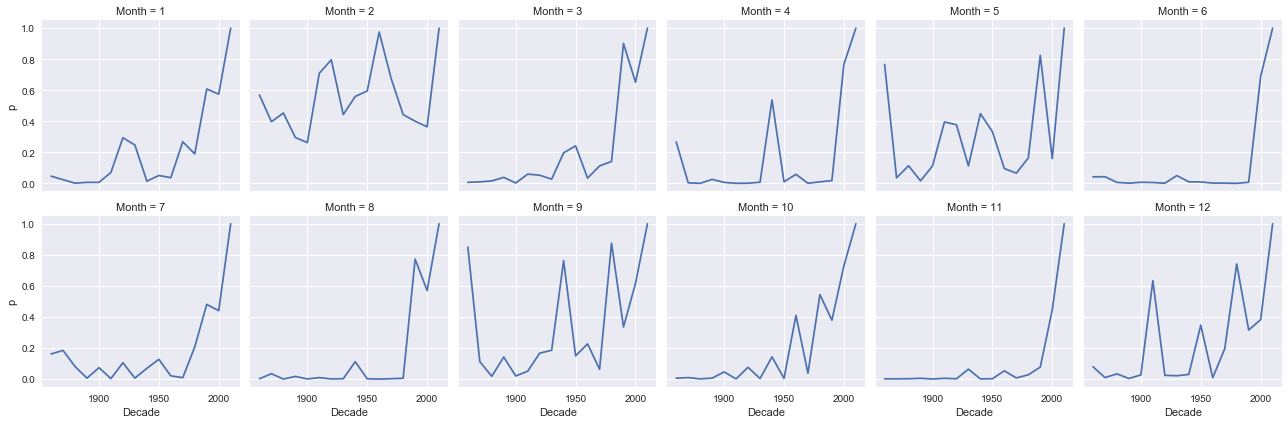

In [13]:
g = sns.FacetGrid(t_stat_df, col='Month', col_wrap=6)
g.map(plt.plot, 'Decade', "p")

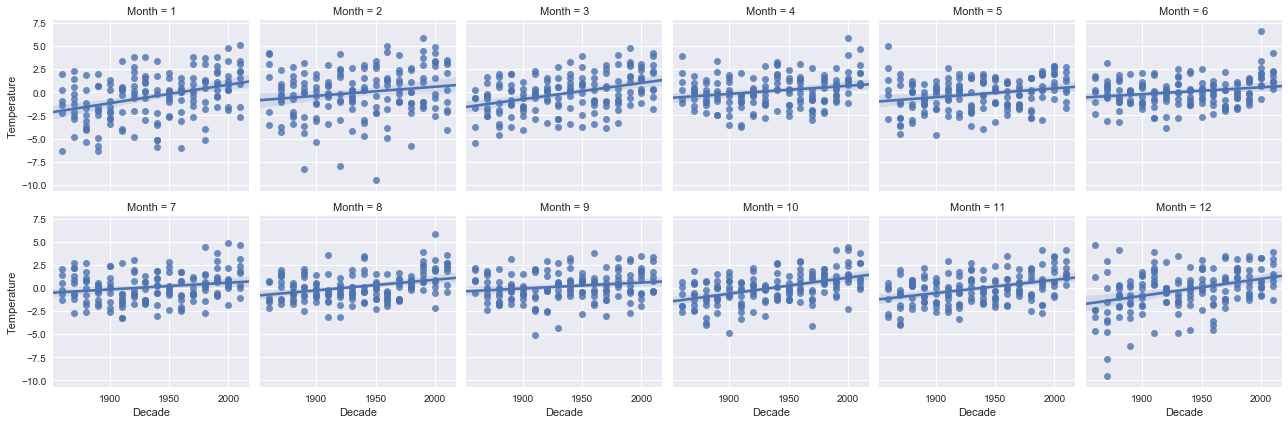

In [14]:
g = sns.FacetGrid(df, col='Month', col_wrap=6)
g.map(sns.regplot, 'Decade', "Temperature")

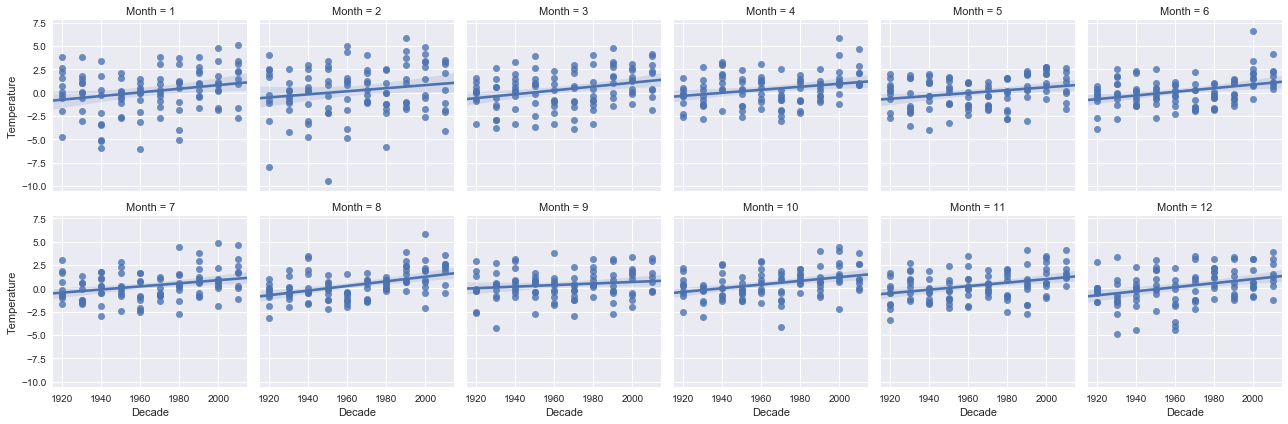

In [15]:
tdf = df[df['Decade'] > 1910]
g = sns.FacetGrid(tdf, col='Month', col_wrap=6)
g.map(sns.regplot, 'Decade', "Temperature")

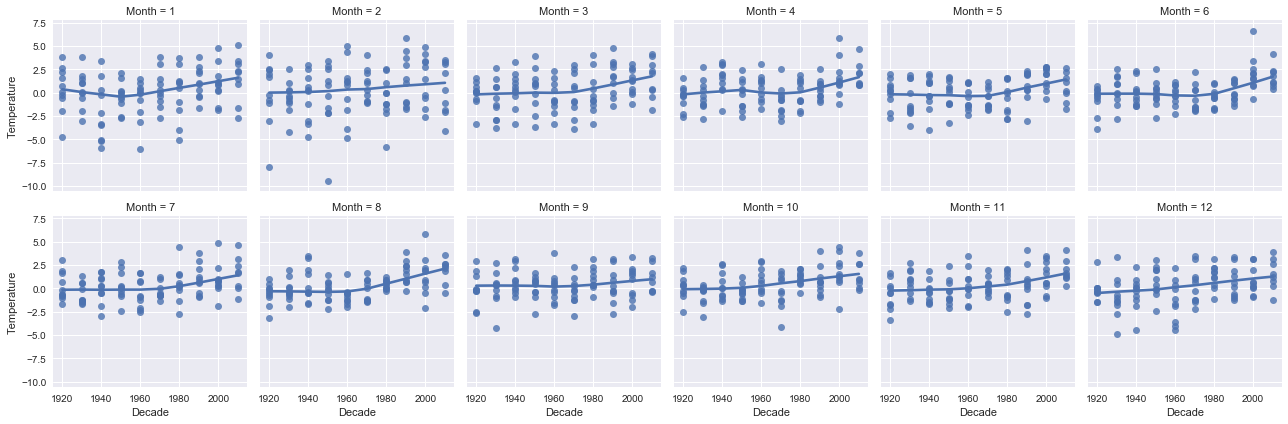

In [16]:
tdf = df[df['Decade'] > 1910]
g = sns.FacetGrid(tdf, col='Month', col_wrap=6)
g.map(sns.regplot, 'Decade', "Temperature", lowess=True)